# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

In [0]:
# Solution in Markdown below

### Random Forest:
A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True`

- 1. n_estimators
    - n_estimators takes an integer an input. It controls the number of trees in the forest. 
      The default value is 10 or 100 depends on version. 
      Too many trees relative to the number of features erode the heterogeneity. Overfitting, when we have to many trees, and
      it will also makes the code run slowlier. 
       Too few trees, then we might not converged to the true mean value. Would not have the flexibility to fit complicated data. 

- 2. max_depth
    - The maximum depth of the tree. By default=None. If None, then nodes are expanded until all leaves are pure or until all leaves contain
        less than min_samples_split samples. 
        If we set the max_depth relatively high, we might end up with overfitting. 

- 3. max_features 
    - The number of features to consider when looking for the best split.
        Defalut='auto', whiche mean that max_features=sqrt(n_features).

- 4. bootstrap
    - Bootstraping is a resampling method. Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
        Default: bootstrap=True

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

In [0]:
# Solution

If we set **max_features = n_features**
and the **bootstrap = false**, then we will end up with a situation, from which the optimal split for each tree would be the same. This simply follows from the description from above - we would use the whole dataset to build each tree, and we will consider all features at once when looking for the best split. 

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [0]:
# Solution

# Import packages
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline 


#Import packages for dimensionality reduction and clustering - unsupervised machine learning
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap 

# Load data - digits and wine dataset
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
data_digits = load_digits()
X_digits = data_digits['data']
y_digits = data_digits['target']

data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

In [0]:
def DimensionReducer(reducer, X, y, standardize=True): #, ax=None
    '''
    Dimensionality reduction function. 
    
    reducer:     Methods used to reduction, e.g. LDA (LinearDiscriminantAnalysis)
    X:           Training set.
    y:           Target values
    standardize: Wether the data is standadized or not. Defalut=True.  
    
    Returns: Transformed array d1,d2 and a plot
    '''
    if standardize==True:
        ssc = StandardScaler()
        X_std = ssc.fit_transform(X)
    
    else:
        X_std = X
    
    if reducer == LDA:
        dmap = reducer().fit_transform(X_std, y)
    elif reducer == umap:
        dmap = reducer.UMAP().fit_transform(X_std)
    else:
        dmap = reducer().fit_transform(X_std)
    d1, d2 = dmap[:,0], dmap[:,1]
    
    return d1, d2
    
    #ax.scatter(d1, d2, c = y, cmap= 'cividis')
    #ax.set_title(reducer.__name__)

### Digits data

In [0]:
d1_PCA, d2_PCA = DimensionReducer(PCA, X_digits, y_digits)
d1_LDA, d2_LDA = DimensionReducer(LDA, X_digits, y_digits)
d1_TSNE, d2_TSNE = DimensionReducer(TSNE, X_digits, y_digits)
d1_umap, d2_umap = DimensionReducer(umap, X_digits, y_digits)

Text(0.5, 0.98, 'Digits data, standardized')

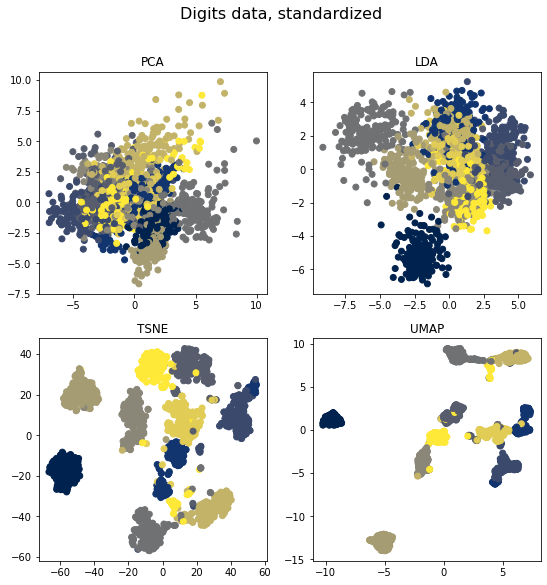

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
axs[0, 0].scatter(d1_PCA, d2_PCA, c = y_digits, cmap = 'cividis')
axs[0, 0].set_title('PCA')

axs[0, 1].scatter(d1_LDA, d2_LDA, c = y_digits, cmap = 'cividis')
axs[0, 1].set_title('LDA')

axs[1, 0].scatter(d1_TSNE, d2_TSNE, c = y_digits, cmap = 'cividis')
axs[1, 0].set_title('TSNE')

axs[1, 1].scatter(d1_umap, d2_umap, c = y_digits, cmap = 'cividis')
axs[1, 1].set_title('UMAP')

fig.suptitle('Digits data, standardized', fontsize=16)

In [0]:
d1_PCA, d2_PCA = DimensionReducer(PCA, X_digits, y_digits, standardize=False)
d1_LDA, d2_LDA = DimensionReducer(LDA, X_digits, y_digits, standardize=False)
d1_TSNE, d2_TSNE = DimensionReducer(TSNE, X_digits, y_digits, standardize=False)
d1_umap, d2_umap = DimensionReducer(umap, X_digits, y_digits, standardize=False)

Text(0.5, 0.98, 'Digits data, not standardized')

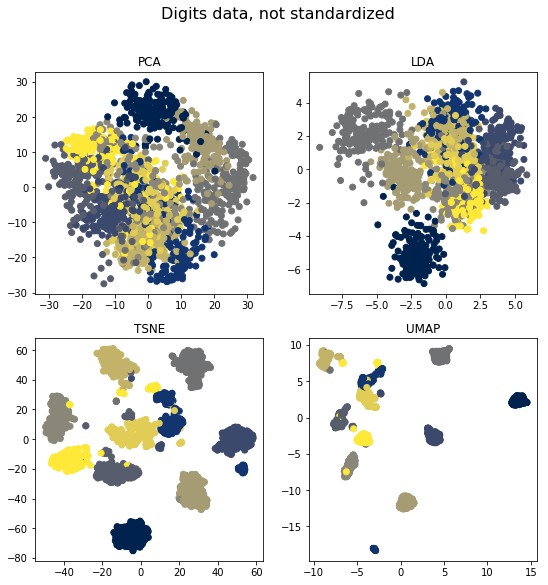

In [0]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
axs[0, 0].scatter(d1_PCA, d2_PCA, c = y_digits, cmap = 'cividis')
axs[0, 0].set_title('PCA')

axs[0, 1].scatter(d1_LDA, d2_LDA, c = y_digits, cmap = 'cividis')
axs[0, 1].set_title('LDA')

axs[1, 0].scatter(d1_TSNE, d2_TSNE, c = y_digits, cmap = 'cividis')
axs[1, 0].set_title('TSNE')

axs[1, 1].scatter(d1_umap, d2_umap, c = y_digits, cmap = 'cividis')
axs[1, 1].set_title('UMAP')

fig.suptitle('Digits data, not standardized', fontsize=16)

### Wine data

In [0]:
d1_PCA, d2_PCA = DimensionReducer(PCA, X_wine, y_wine)
d1_LDA, d2_LDA = DimensionReducer(LDA, X_wine, y_wine)
d1_TSNE, d2_TSNE = DimensionReducer(TSNE, X_wine, y_wine)
d1_umap, d2_umap = DimensionReducer(umap, X_wine, y_wine)

Text(0.5, 0.98, 'Wine data, standardized')

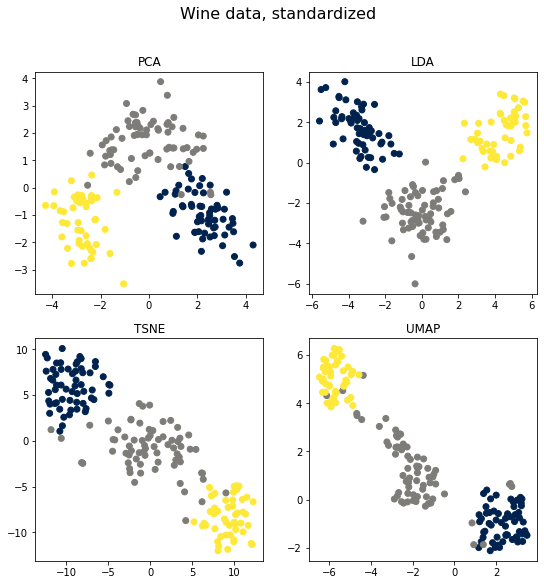

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
axs[0, 0].scatter(d1_PCA, d2_PCA, c = y_wine, cmap = 'cividis')
axs[0, 0].set_title('PCA')

axs[0, 1].scatter(d1_LDA, d2_LDA, c = y_wine, cmap = 'cividis')
axs[0, 1].set_title('LDA')

axs[1, 0].scatter(d1_TSNE, d2_TSNE, c = y_wine, cmap = 'cividis')
axs[1, 0].set_title('TSNE')

axs[1, 1].scatter(d1_umap, d2_umap, c = y_wine, cmap = 'cividis')
axs[1, 1].set_title('UMAP')

fig.suptitle('Wine data, standardized', fontsize=16)

In [0]:
d1_PCA, d2_PCA = DimensionReducer(PCA, X_wine, y_wine, standardize=False)
d1_LDA, d2_LDA = DimensionReducer(LDA, X_wine, y_wine, standardize=False)
d1_TSNE, d2_TSNE = DimensionReducer(TSNE, X_wine, y_wine, standardize=False)
d1_umap, d2_umap = DimensionReducer(umap, X_wine, y_wine, standardize=False)

Text(0.5, 0.98, 'Wine data, not standardized')

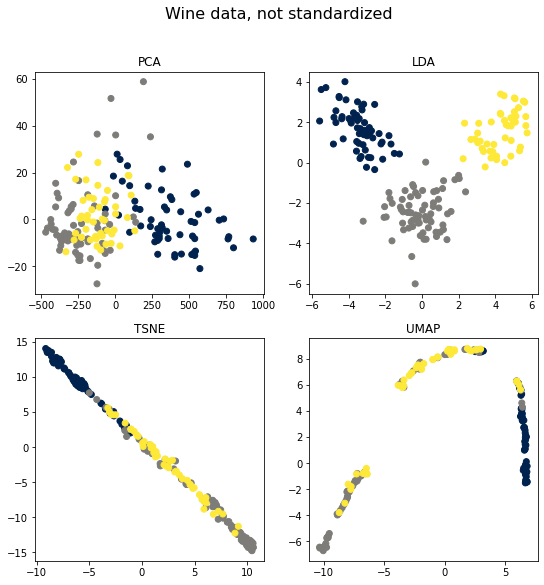

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9))
axs[0, 0].scatter(d1_PCA, d2_PCA, c = y_wine, cmap = 'cividis')
axs[0, 0].set_title('PCA')

axs[0, 1].scatter(d1_LDA, d2_LDA, c = y_wine, cmap = 'cividis')
axs[0, 1].set_title('LDA')

axs[1, 0].scatter(d1_TSNE, d2_TSNE, c = y_wine, cmap = 'cividis')
axs[1, 0].set_title('TSNE')

axs[1, 1].scatter(d1_umap, d2_umap, c = y_wine, cmap = 'cividis')
axs[1, 1].set_title('UMAP')

fig.suptitle('Wine data, not standardized', fontsize=16)

2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?

If we do not standardize the wine dataset, then it only seems to be the LDA method that is able to properly reduce the dimensionality of our wine data. The TSNE and UMAP methods produce very strange outputs following dimensionality reduction without standardization.

We believe that this is not a problem a problem for the digits data, as all of the features in the digits "feature space" contain the same range of values, since the features essentially corresponds to the pixel values in each image. 


3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data 

We observe dimensionality reduction superiority of the TSNE and UMAP methods in the digits data, possibly because the features in this data set are more complex. In the wine data, where we suspect the features to potentially be highly correlated, it is difficult to determine the most optimal methods. We believe the TSNE and UMAP methods are superior when non-linear relationships in the data needs to be taken into consideration. 

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

In [0]:
# Solution 

With reference to Athey, Imbens (2015) a tree is honest when a sample of the training data (including validation data) is used for partiotioning the covariates and the remaining half is used for estimating the treatement effects. 

Honesty has the implications of providing unbiased estimates of the treatment effects, that is it provide estimates as if the partition 
had been given exegonoues. The intuition is similar to spliting ones data into test and training data, which prevents a dishonest evalution of the local treatment effects. Opposed to conventional decision trees we do not aim to predict outcomes, classes or values with a partition of training and test data. 

We are interested in causual effects and the estimation of local treatment effects instead of predictive performance. To implement the honest causual forest model we still have to partion data for evaluation of honest treatment effects.